In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_pickle('Data/data_with_embeddings.pkl')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23085 entries, 0 to 23084
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Authors                        22985 non-null  object
 1   Author full names              22985 non-null  object
 2   Author(s) ID                   22985 non-null  object
 3   Title                          23084 non-null  object
 4   Year                           23085 non-null  int64 
 5   Source title                   22303 non-null  object
 6   Volume                         21919 non-null  object
 7   Issue                          14218 non-null  object
 8   Art. No.                       8483 non-null   object
 9   Page start                     14421 non-null  object
 10  Page end                       14359 non-null  object
 11  Page count                     23085 non-null  int64 
 12  Cited by                       23085 non-null  int64 
 13  D

In [5]:
abstract_embeddings = np.array(data['Abstract_Embeddings'].tolist())

In [6]:
abstract_embeddings[0]

array([-1.44615229e-02, -5.00668995e-02,  3.58444117e-02,  3.84140871e-02,
        1.85158756e-02, -7.52251269e-03, -7.93940499e-02,  8.67789090e-02,
       -1.84392335e-03, -1.00329961e-03, -6.48231730e-02,  3.75620462e-02,
        5.73675521e-03,  2.86166798e-02,  1.87555235e-02,  5.64477034e-02,
        1.95740480e-02, -8.48573260e-03, -7.22303838e-02,  9.44518596e-02,
        2.17002407e-02, -3.43006253e-02, -2.55454797e-03,  1.92736518e-02,
       -4.36927704e-03,  5.09153008e-02, -1.09696642e-01,  3.17689357e-03,
        3.24725620e-02, -2.83222403e-02,  4.13468182e-02, -1.17496207e-01,
        2.64757127e-02,  6.19604997e-02, -1.70022901e-02,  2.76798010e-02,
        8.69643409e-03, -5.67816906e-02, -5.40700220e-02, -2.08992530e-02,
       -1.05189256e-01,  3.09359469e-02,  4.72563282e-02, -2.52701417e-02,
        1.06811926e-01,  7.24733099e-02, -2.85610259e-02, -4.34902236e-02,
       -3.20684933e-03,  1.06585957e-01, -4.03003022e-02,  2.51797456e-02,
        9.74050984e-02,  

In [7]:
print(abstract_embeddings.shape, abstract_embeddings.ndim, abstract_embeddings.dtype, abstract_embeddings.size)


(23085, 384) 2 float64 8864640


In [8]:
from sklearn.preprocessing import normalize

In [9]:
normalize_embeddings = normalize(abstract_embeddings)

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=12, random_state=42, n_init=10, max_iter=300)
kmeans.fit(normalize_embeddings)
categories = kmeans.labels_

In [12]:
print(np.unique(categories, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32), array([ 557, 2502, 1457, 4079, 2264, 1009, 1541, 2727, 1505, 1810, 1418,
       2216]))


In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)

In [15]:
embeddings_2d = pca.fit_transform(normalize_embeddings)

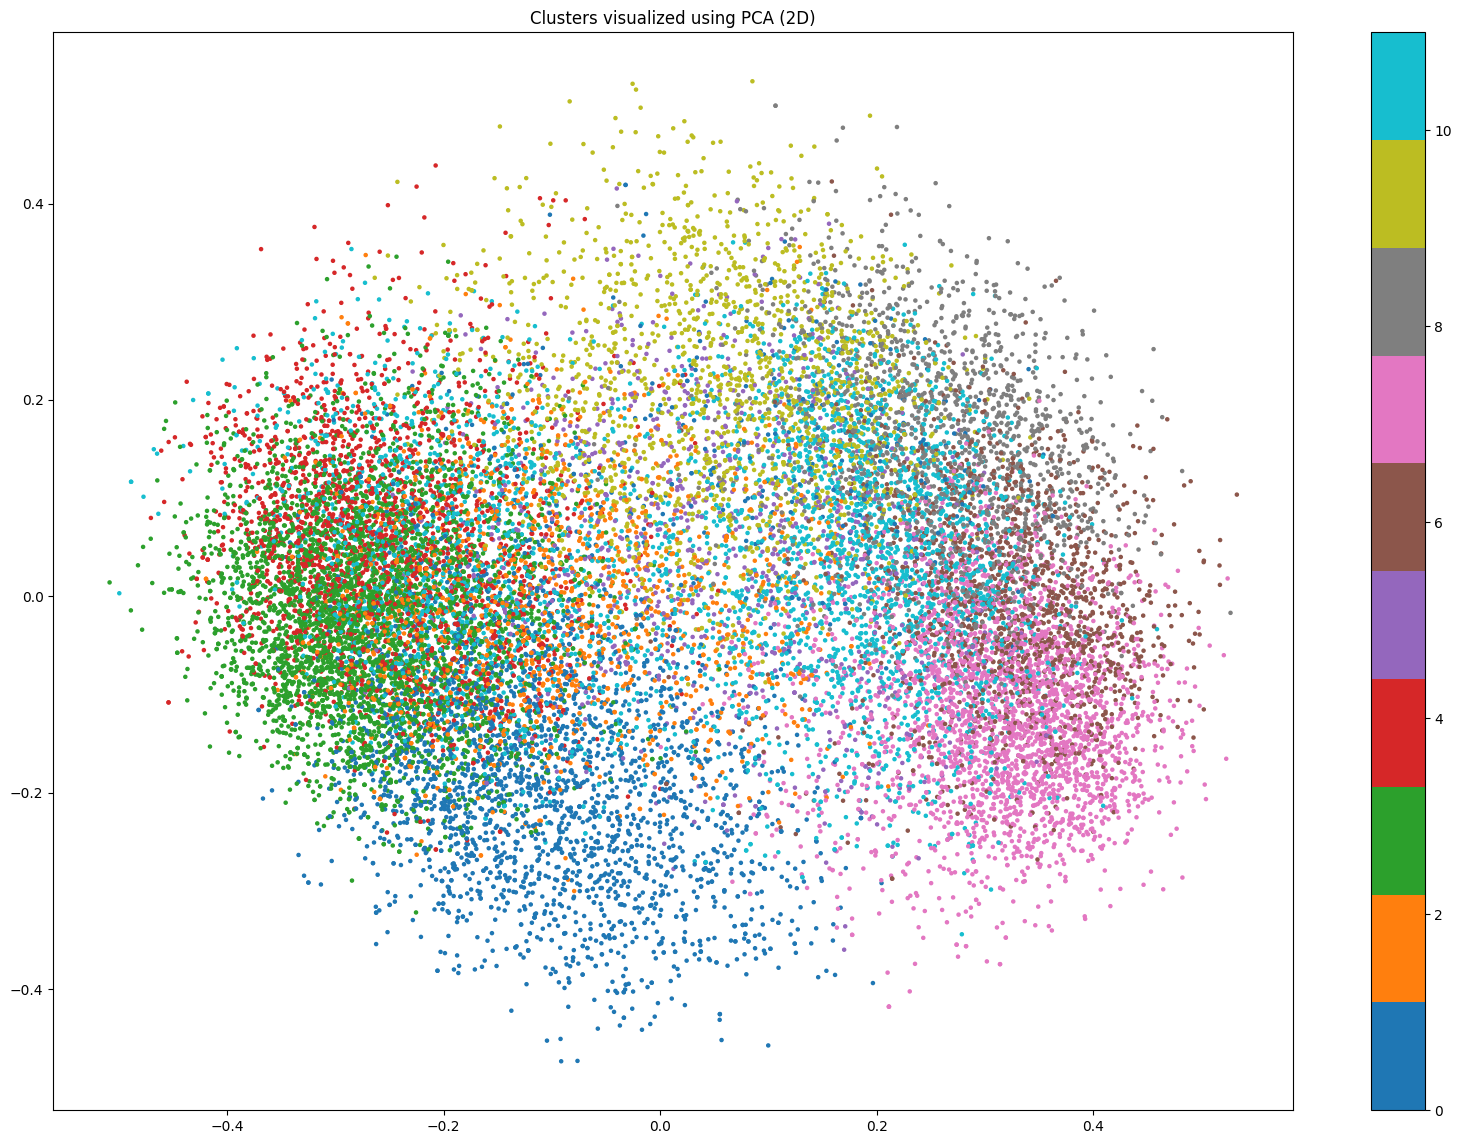

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))
plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=categories.astype(float),  # Ensure categories are float
    cmap='tab10',
    s=5
)

plt.title("Clusters visualized using PCA (2D)")
plt.colorbar()
plt.show()


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['Abstract'].tolist())
feature_names = vectorizer.get_feature_names_out()

In [18]:
cluster_keywords = {}

for cluster_id in np.unique(categories):
    indices = np.where(categories == cluster_id)[0]  
    cluster_tfidf = tfidf_matrix[indices].mean(axis=0).A1  
    top_indices = cluster_tfidf.argsort()[-10:][::-1]
    keywords = [feature_names[i] for i in top_indices]
    cluster_keywords[cluster_id] = keywords   

In [19]:
for cluster_id, keywords in cluster_keywords.items():
    print(f"Cluster {cluster_id}: {keywords}")

Cluster 0: ['learning', 'models', 'model', 'ann', 'frp', 'machine', 'ml', 'neural', 'data', 'concrete']
Cluster 1: ['concrete', 'frp', 'bars', 'bond', 'gfrp', 'strength', 'reinforced', 'bfrp', 'fiber', 'steel']
Cluster 2: ['bridge', 'deck', 'frp', 'bridges', 'concrete', 'construction', 'steel', 'design', 'decks', 'reinforced']
Cluster 3: ['beams', 'concrete', 'frp', 'rc', 'strengthened', 'shear', 'strengthening', 'beam', 'cfrp', 'reinforced']
Cluster 4: ['columns', 'concrete', 'confined', 'frp', 'axial', 'confinement', 'column', 'steel', 'tube', 'strain']
Cluster 5: ['joints', 'adhesive', 'joint', 'cfrp', 'bond', 'bonded', 'failure', 'steel', 'strength', 'joining']
Cluster 6: ['composites', 'inf', 'carbon', 'properties', 'mechanical', 'epoxy', 'composite', 'fiber', 'cfrp', 'matrix']
Cluster 7: ['composites', 'properties', 'fiber', 'fibers', 'mechanical', 'natural', 'composite', 'strength', 'matrix', 'tensile']
Cluster 8: ['process', 'cfrp', 'drilling', 'manufacturing', 'cutting', 'fibe

In [20]:
cluster_names = {
    0: "Machine Learning and Data-Driven FRP Modeling",
    1: "Bond Behavior and Reinforcement with FRP Bars",
    2: "FRP in Bridge Engineering and Deck Systems",
    3: "Flexural and Shear Strengthening of RC Beams Using FRP",
    4: "Confinement and Axial Strengthening of Concrete Columns",
    5: "FRP–Steel Joints, Adhesive Bonding and Interface Behavior",
    6: "Carbon Fiber Composites: Mechanical Behavior and Matrix Systems",
    7: "Natural Fiber and Bio-Based Composite Materials",
    8: "Manufacturing and Machining of FRP Composites",
    9: "Sandwich Composite Structures and Panel Stability",
    10: "Seismic Retrofitting of Masonry Walls Using FRP",
    11: "Damage, Fatigue, and Thermal Effects in Composite Laminates"
}

data['Cluster_ID'] = categories
data['Category'] = data['Cluster_ID'].map(cluster_names)



In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23085 entries, 0 to 23084
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Authors                        22985 non-null  object
 1   Author full names              22985 non-null  object
 2   Author(s) ID                   22985 non-null  object
 3   Title                          23084 non-null  object
 4   Year                           23085 non-null  int64 
 5   Source title                   22303 non-null  object
 6   Volume                         21919 non-null  object
 7   Issue                          14218 non-null  object
 8   Art. No.                       8483 non-null   object
 9   Page start                     14421 non-null  object
 10  Page end                       14359 non-null  object
 11  Page count                     23085 non-null  int64 
 12  Cited by                       23085 non-null  int64 
 13  D

In [22]:
import re

# Function to clean Excel sheet names
def clean_sheet_name(name):
    # Remove invalid characters and truncate to 31 chars
    cleaned = re.sub(r'[:\\/*?\[\]]', '', str(name))
    return cleaned[:31]

# Export to Excel with sanitized sheet names
with pd.ExcelWriter('Final Database.xlsx', engine='xlsxwriter') as writer:
    for category in data['Category'].unique():
        category_df = data[data['Category'] == category]
        sheet_name = clean_sheet_name(category)
        category_df.to_excel(writer, sheet_name=sheet_name, index=False)

g:\FRP data processing\.venv\Lib\site-packages\xlsxwriter\worksheet.py:1303: UserWarning: Ignoring URL 'https://orcid.org/0000-0003-3721-1293 Yuan Xin yuanxin9988@163.com 1 https://orcid.org/0000-0002-3504-253X Zhu Chaoyu zhuchaoyu@126.com 1 Zheng Wei robinwll@163.com 2 https://orcid.org/0000-0002-6050-3537 Tang Baijian tangbaijian@163.com 1 Nimbalkar Sanjay 1 School of Civil Engineering Suzhou University of Science and Technology Suzhou 215011 China usts.edu.cn 2 Suzhou Zhongheng Access Bridge Co., Ltd. Suzhou 215000 China 2019 19 12 2019 2019 02 08 2019 25 11 2019 19 12 2019 2019 Copyright © 2019 Xin Yuan et al. This is an open access article distributed under the Creative Commons Attribution License , which permits unrestricted use, distribution, and reproduction in any medium, provided the original work is properly cited. Numerical investigation of mechanical behavior of carbon fiber-reinforced polymer- (CFRP-) reinforced concrete beam after high-temperature action of asphalt pavin

In [23]:
data.to_csv('Final_Database.csv', index=False)

C:\Users\owais\AppData\Local\Temp\ipykernel_8852\3335342281.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')


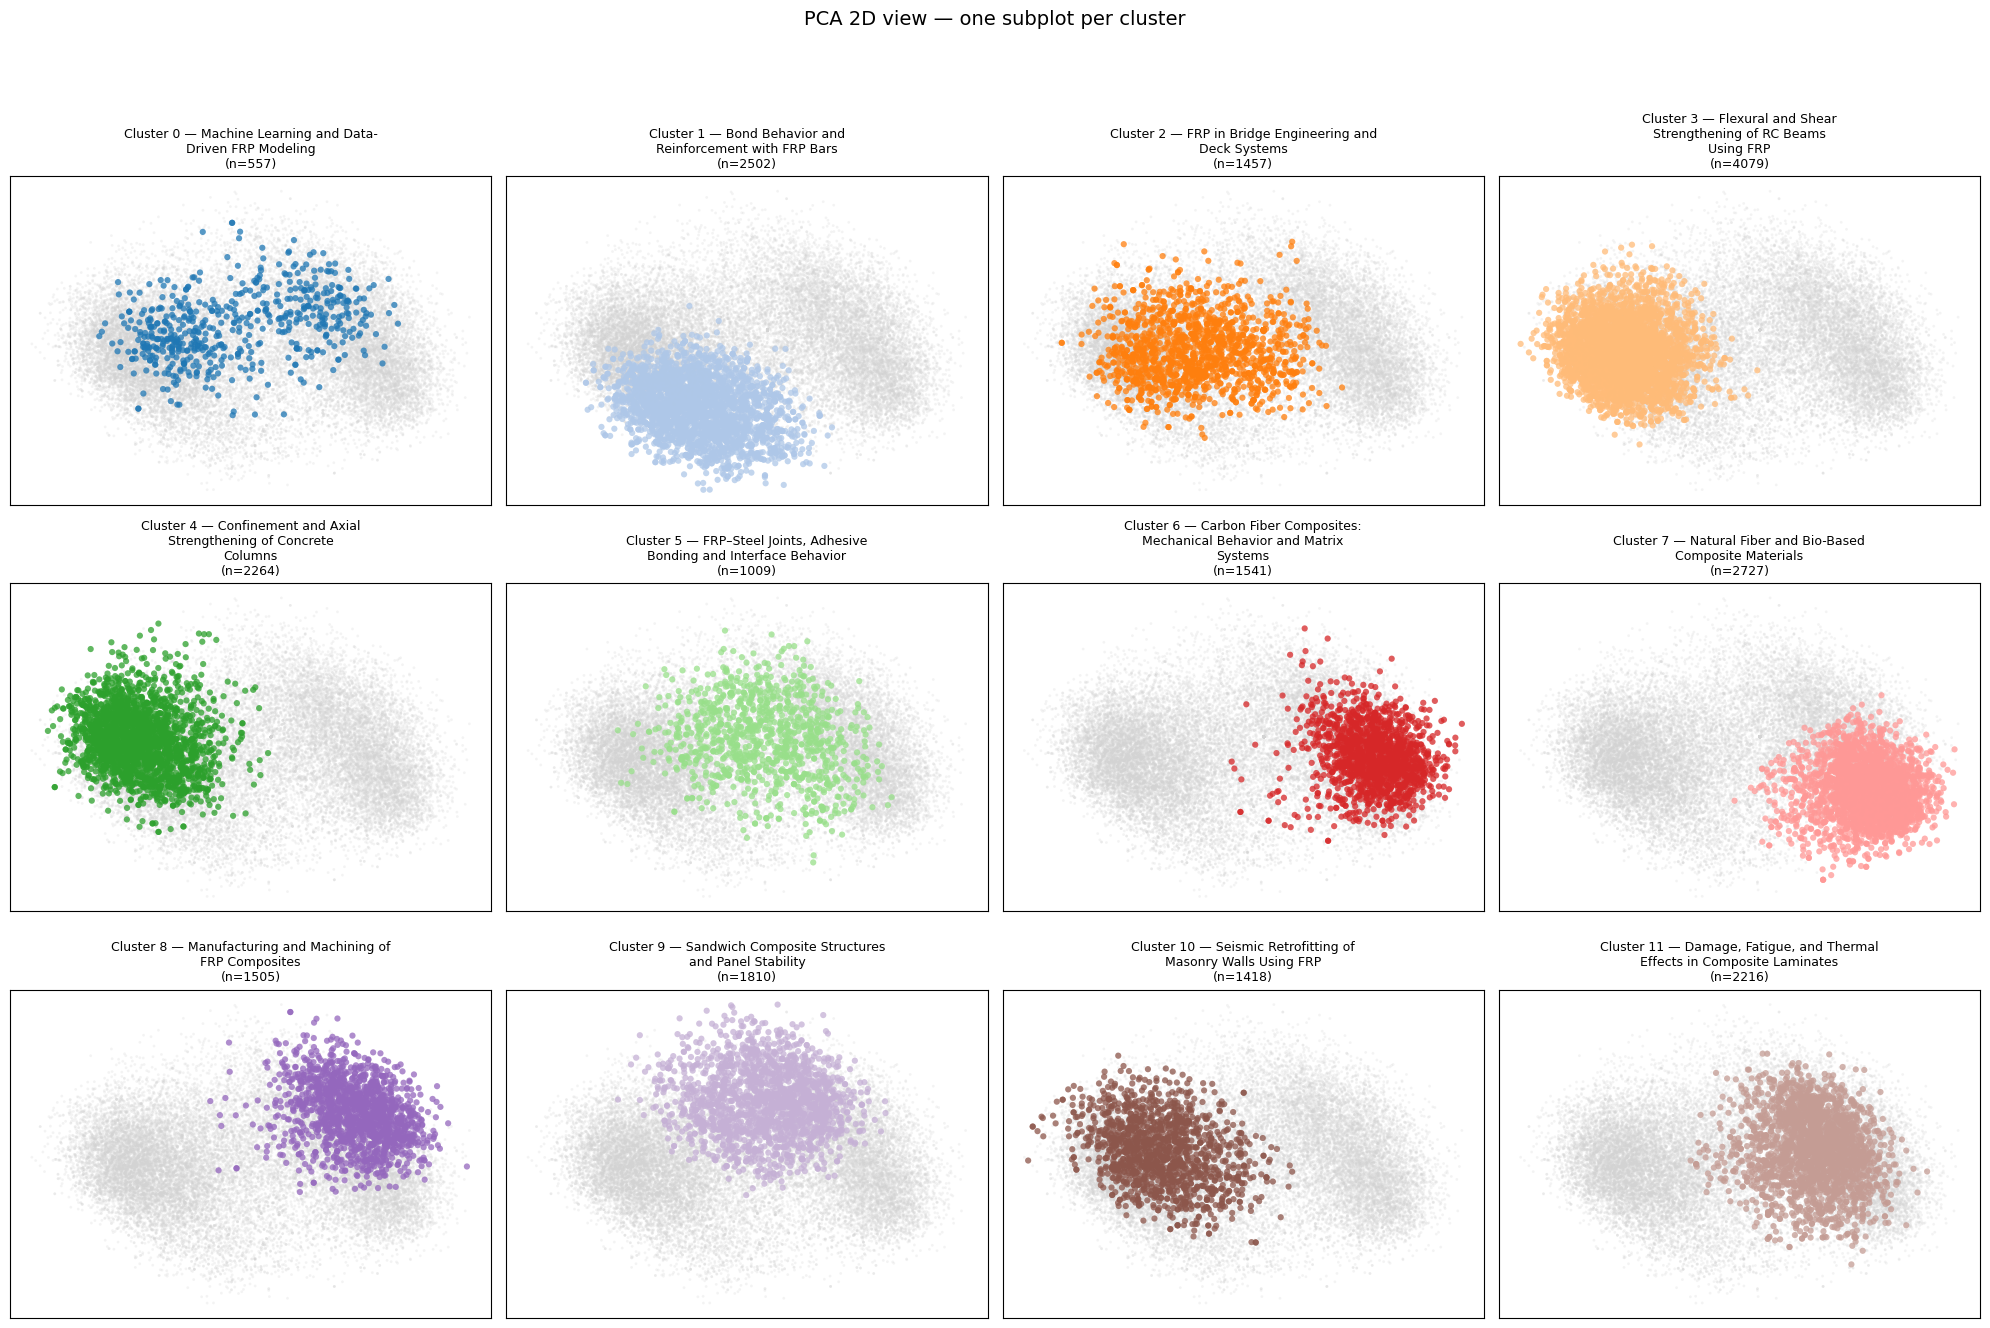

In [24]:
# Visualize each cluster in a separate subplot with distinct colors
clusters = np.unique(categories)
n_clusters = len(clusters)

import textwrap
from matplotlib import cm

# layout
cols = 4
rows = int(np.ceil(n_clusters / cols))

# Create colormap and colors list (wrap if more colors needed)
cmap = cm.get_cmap('tab20')
colors = [cmap(i % cmap.N) for i in range(n_clusters)]

# common axis limits so plots are comparable
x_min, x_max = embeddings_2d[:, 0].min(), embeddings_2d[:, 0].max()
y_min, y_max = embeddings_2d[:, 1].min(), embeddings_2d[:, 1].max()
pad_x = (x_max - x_min) * 0.05 if x_max > x_min else 1.0
pad_y = (y_max - y_min) * 0.05 if y_max > y_min else 1.0

# Increase figure size for readability and handle single-axis case
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4.5), constrained_layout=False)
if rows * cols == 1:
    axes = np.array([axes])
else:
    axes = np.array(axes).flatten()

# Adjust spacing between subplots to avoid title overlap
plt.subplots_adjust(top=0.90, hspace=0.35, wspace=0.25)

for i, cid in enumerate(clusters):
    ax = axes[i]
    mask = categories == cid
    # faded background of all points for context (smaller, lighter)
    ax.scatter(embeddings_2d[~mask, 0], embeddings_2d[~mask, 1], color='lightgray', s=4, alpha=0.25, edgecolors='none')
    # highlighted cluster points — smaller and semi-transparent to avoid heavy dots
    ax.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], color=colors[i], s=20, alpha=0.75, edgecolors='none')
    name = cluster_names.get(int(cid), f"Cluster {int(cid)}")
    # wrap long titles to avoid overlap
    wrapped = textwrap.fill(name, width=30)
    ax.set_title(f"Cluster {int(cid)} — {wrapped}\n(n={mask.sum()})", fontsize=9)
    ax.set_xlim(x_min - pad_x, x_max + pad_x)
    ax.set_ylim(y_min - pad_y, y_max + pad_y)
    ax.set_xticks([])
    ax.set_yticks([])

# turn off any unused subplots
for j in range(n_clusters, rows * cols):
    axes[j].axis('off')

fig.suptitle('PCA 2D view — one subplot per cluster', fontsize=14)
# Leave room for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

In [31]:
# Interactive PCA (2D) using Plotly
import plotly.express as px
import plotly.io as pio
import webbrowser
import os

# Prefer a notebook renderer if available, otherwise we'll explicitly write an HTML file and open it
for candidate in ("notebook_connected", "notebook", "jupyterlab", "svg", "browser"):
    try:
        pio.renderers.default = candidate
        break
    except Exception:
        continue

# Build dataframe for plotting
# Ensure df length matches embeddings
df_plot = pd.DataFrame(embeddings_2d, columns=['x','y'])
df_plot['cluster'] = categories
# Use .get to be robust if Title/Abstract columns missing
df_plot['title'] = data.get('Title', pd.Series([''] * len(df_plot)))[:len(df_plot)]
df_plot['abstract'] = data.get('Abstract', pd.Series([''] * len(df_plot)))[:len(df_plot)]

fig = px.scatter(
    df_plot, x='x', y='y', color='cluster', hover_data=['title', 'abstract'],
    title='Interactive PCA (2D) — hover shows title/abstract', width=1000, height=700
)

# Try to display inline first, then fall back to writing a file and opening the browser
try:
    fig.show()
except Exception as e:
    print('Inline display failed:', repr(e))
    out_path = os.path.join(os.getcwd(), 'pca_interactive.html')
    try:
        fig.write_html(out_path, include_plotlyjs='cdn', full_html=True)
        print(f'Interactive plot saved to {out_path}')
        opened = webbrowser.open('file://' + out_path)
        if not opened:
            print('webbrowser.open returned False — you can open the file manually in your browser.')
    except Exception as e2:
        print('Failed to write/open HTML file:', repr(e2))
        # As a last resort, try the browser renderer
        try:
            fig.show(renderer='browser')
        except Exception as e3:
            print('Final fallback failed:', repr(e3))
            raise


Inline display failed: ValueError('Mime type rendering requires nbformat>=4.2.0 but it is not installed')
Interactive plot saved to g:\FRP data processing\pca_interactive.html
Interactive plot saved to g:\FRP data processing\pca_interactive.html


Silhouette score (cosine): 0.06855794377082372


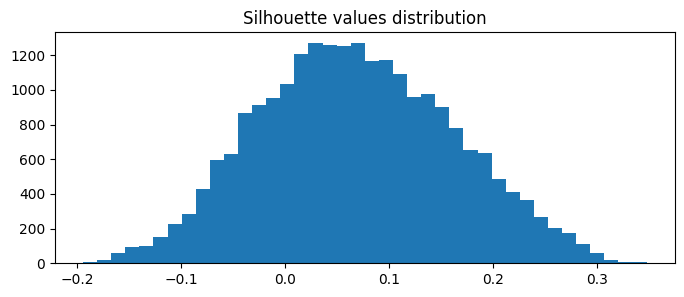

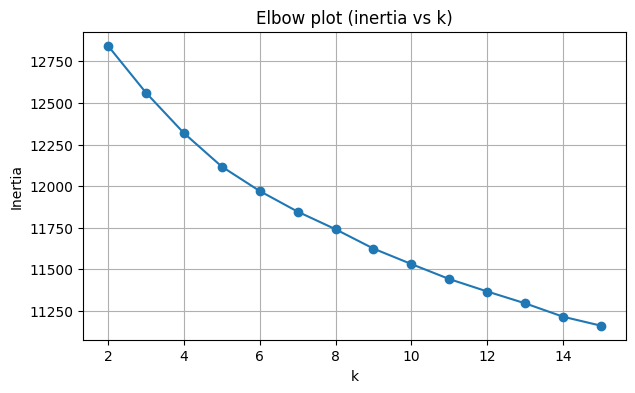

In [29]:
# Silhouette score + distribution and elbow (inertia) plot
from sklearn.metrics import silhouette_score, silhouette_samples
score = silhouette_score(normalize_embeddings, categories, metric='cosine')
print('Silhouette score (cosine):', score)

sil_vals = silhouette_samples(normalize_embeddings, categories, metric='cosine')
plt.figure(figsize=(8,3))
plt.hist(sil_vals, bins=40)
plt.title('Silhouette values distribution')
plt.show()

# Elbow (inertia) for range of k
ks = range(2, 16)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=5)
    km.fit(normalize_embeddings)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(list(ks), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow plot (inertia vs k)')
plt.grid(True)
plt.show()

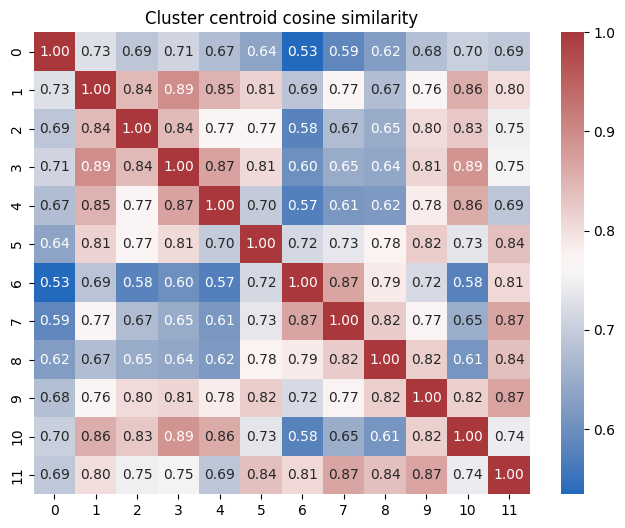

In [27]:
# Cluster centroid cosine-similarity heatmap
from sklearn.metrics.pairwise import cosine_similarity
centroids = []
labels = []
for cid in np.unique(categories):
    labels.append(int(cid))
    centroids.append(normalize_embeddings[categories==cid].mean(axis=0))
centroids = np.vstack(centroids)
sim = cosine_similarity(centroids)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(sim, annot=True, fmt='.2f', cmap='vlag', xticklabels=labels, yticklabels=labels)
plt.title('Cluster centroid cosine similarity')
plt.show()

Saved TF-IDF plot: Media\cluster 0 top 10 term.png


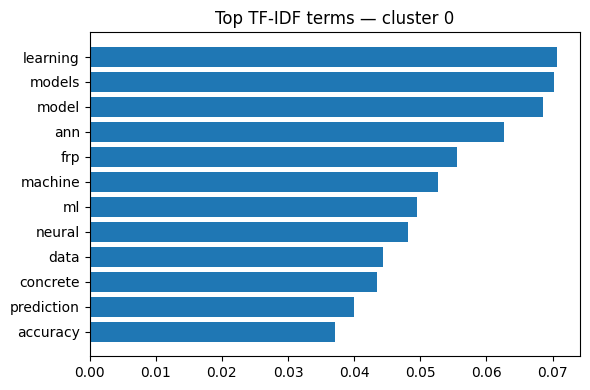

Saved TF-IDF plot: Media\cluster 1 top 10 term.png


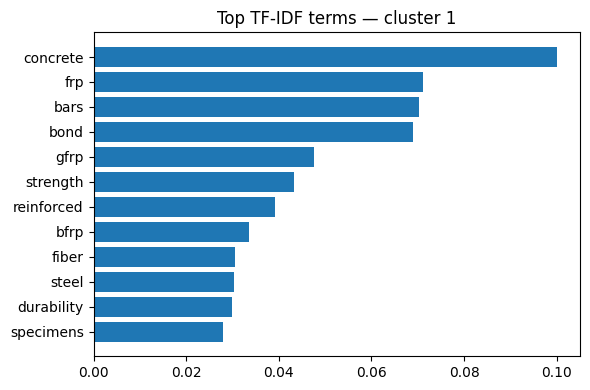

Saved TF-IDF plot: Media\cluster 2 top 10 term.png


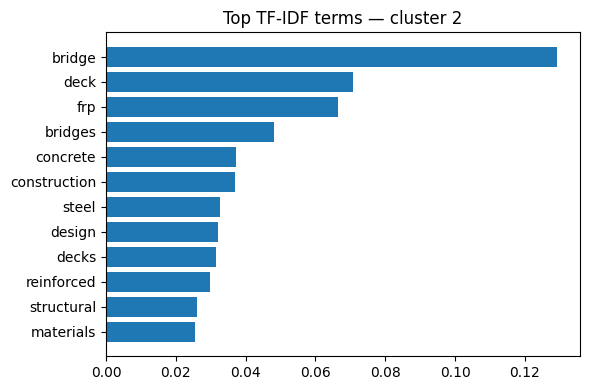

Saved TF-IDF plot: Media\cluster 3 top 10 term.png


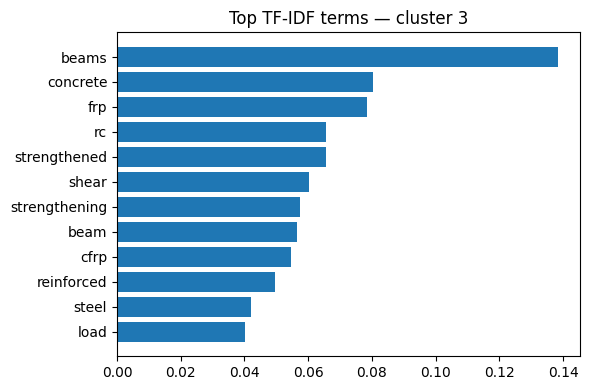

Saved TF-IDF plot: Media\cluster 4 top 10 term.png


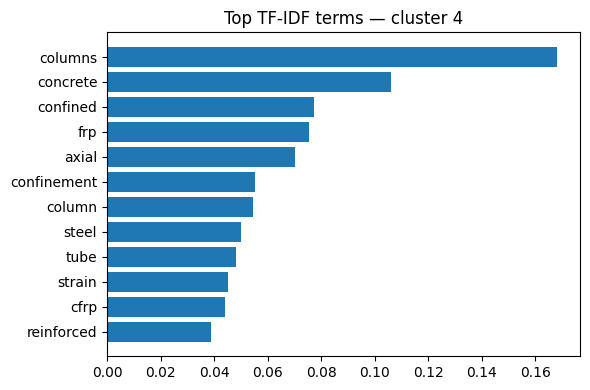

Saved TF-IDF plot: Media\cluster 5 top 10 term.png


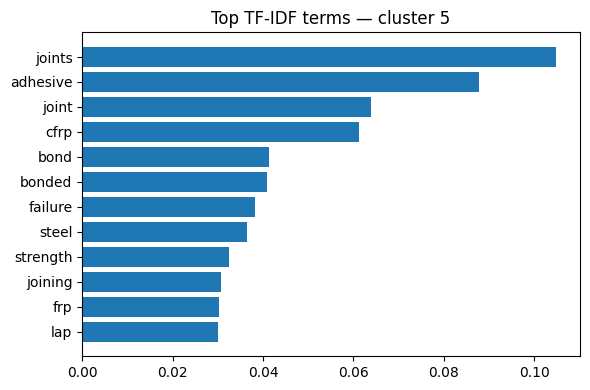

Saved TF-IDF plot: Media\cluster 6 top 10 term.png


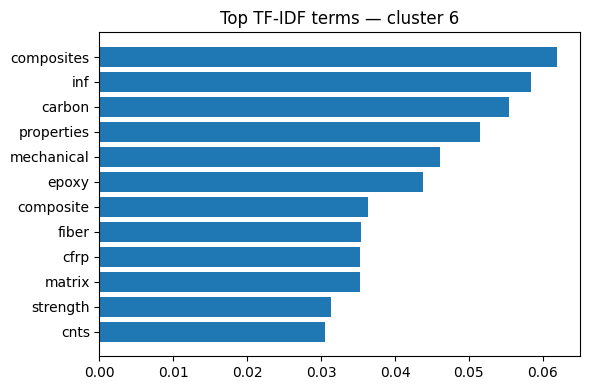

Saved TF-IDF plot: Media\cluster 7 top 10 term.png


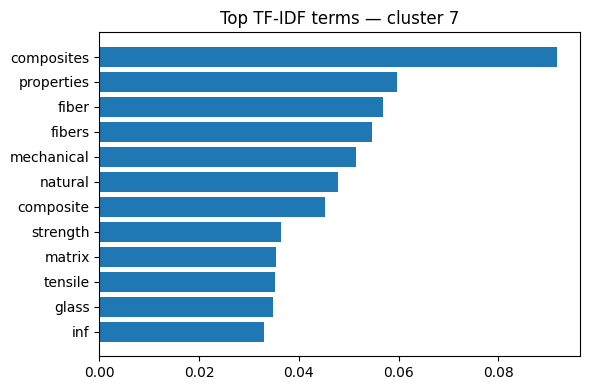

Saved TF-IDF plot: Media\cluster 8 top 10 term.png


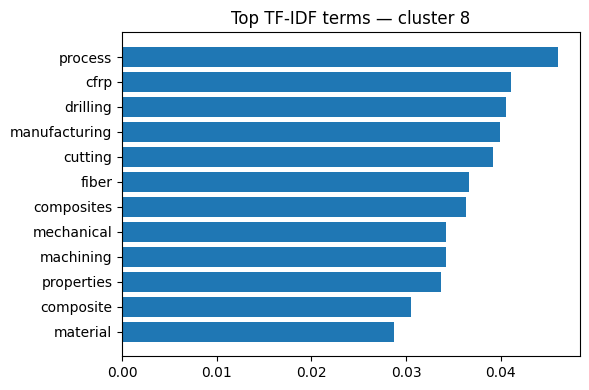

Saved TF-IDF plot: Media\cluster 9 top 10 term.png


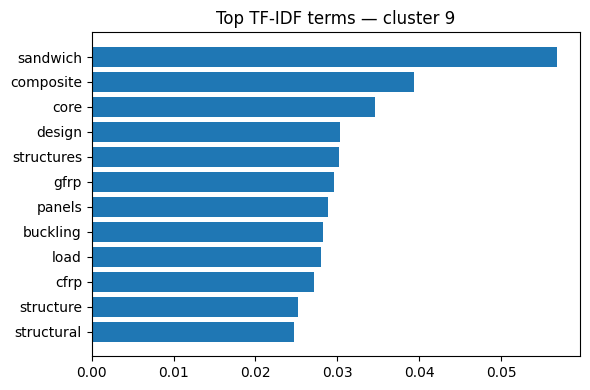

Saved TF-IDF plot: Media\cluster 10 top 10 term.png


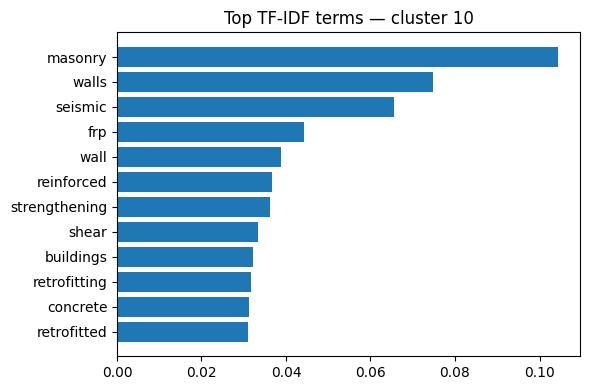

Saved TF-IDF plot: Media\cluster 11 top 10 term.png


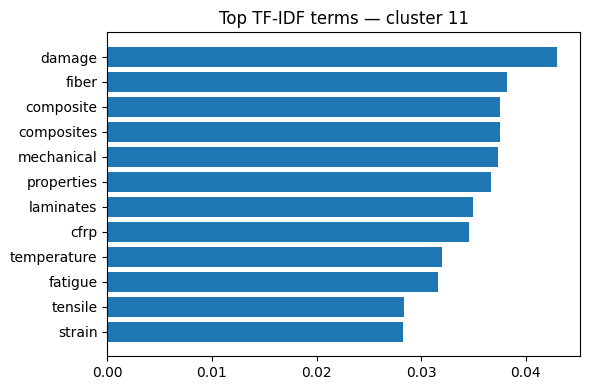

Saved sample titles to: Media\cluster 0 top 10 term samples.txt


In [33]:
# Top TF-IDF terms per cluster — save each plot to `Media/` with requested filename format
import os
from datetime import datetime
out_dir = 'Media'
os.makedirs(out_dir, exist_ok=True)

def top_tfidf_for_cluster(cluster_id, top_n=10):
    indices = np.where(categories==cluster_id)[0]
    if len(indices) == 0:
        return []
    avg = tfidf_matrix[indices].mean(axis=0).A1
    top_idx = avg.argsort()[-top_n:][::-1]
    return [(feature_names[i], float(avg[i])) for i in top_idx]

for cid in sorted(np.unique(categories)):
    terms = top_tfidf_for_cluster(cid, top_n=12)
    if not terms:
        print(f'No terms for cluster {cid}, skipping')
        continue
    words, vals = zip(*terms)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.barh(words[::-1], vals[::-1])
    ax.set_title(f'Top TF-IDF terms — cluster {cid}')
    plt.tight_layout()

    # Primary filename requested: "cluster {cid} top 10 term.png"
    base_name = f'cluster {cid} top 10 term.png'
    target_path = os.path.join(out_dir, base_name)

    # If file exists, append timestamp to avoid overwriting
    if os.path.exists(target_path):
        ts = datetime.now().strftime('%Y%m%d_%H%M%S')
        target_path = os.path.join(out_dir, f'cluster {cid} top 10 term_{ts}.png')

    fig.savefig(target_path, dpi=200, bbox_inches='tight')
    print(f'Saved TF-IDF plot: {target_path}')
    plt.show()
    plt.close(fig)

# Save sample titles for cluster 0 (adjust cluster id as needed) with requested base name and timestamp if needed
try:
    samples0 = data[data['Cluster_ID']==0]['Title'].head(5).to_list()
    base_txt = f'cluster 0 top 10 term samples.txt'
    txt_path = os.path.join(out_dir, base_txt)
    if os.path.exists(txt_path):
        ts = datetime.now().strftime('%Y%m%d_%H%M%S')
        txt_path = os.path.join(out_dir, f'cluster 0 top 10 term samples_{ts}.txt')
    with open(txt_path, 'w', encoding='utf-8') as f:
        for t in samples0:
            f.write(str(t).strip() + '\n')
    print(f'Saved sample titles to: {txt_path}')
except Exception as e:
    print('Could not save sample titles:', e)